## Required packages

In [3]:
import numpy as np
from numpy.random import normal, uniform, poisson
import matplotlib.pyplot as pl

## Function for baseline

In [4]:
def weibull(a,b,grille):
    lamb0 = np.zeros((grille.shape[0],))
    for k in np.arange(grille.shape[0]):
        lamb0[k] = (b**a)*a*(grille[k]**(a-1))
    return lamb0

## Time Varying Coefficients

In [41]:
def beta_const(grille, param=1.):
    c = param
    beta_const = c*np.ones((grille.shape[0],))
    return beta_const
def beta_piecewise_const(grille, param=(4.,2.,1.)):
    c1,c2,rupture = param
    beta_2_const = c1*(grille<rupture)+c2*(grille>=rupture)
    return beta_2_const
def beta_linear(grille, param=(2.,-0.5)):
    ord_or,pente = param
    beta_lin = ord_or+pente*grille
    return beta_lin
def beta_quadratic(grille, param=(0.5)):
    a = param
    beta_quad = a*grille**2
    return beta_quad

## Time varying covariates

Chaque X(k) suit une loi normale indépendante

In [30]:
def IndependantNormalX(n, scaleX=0.5):
    X=[]
    n_points = grid.shape[0]
    for i in np.arange(n):#n
        #X_i = np.vstack((i*np.ones(n_points),grid,normal(scale = scaleX, size = (p,n_points)).reshape(((p),n_points)))).T
        X_i = np.vstack((normal(scale = scaleX, size = (p,n_points)).reshape(((p),n_points)))).T
        X.append(X_i)
    return X

## Simulations

In [42]:
n = 10
p = 3
grid = np.linspace(0.1,3,num=50)
lamb0 = weibull(1.,1.,grid)
beta = np.vstack([beta_piecewise_const(grid, param=(4.,2.,1.)),
                  beta_linear(grid, param=(2.,-0.5)),
                  beta_quadratic(grid, param=(0.5))])
X = IndependantNormalX(n=grid.shape[0], scaleX=0.5)

### Plot baseline

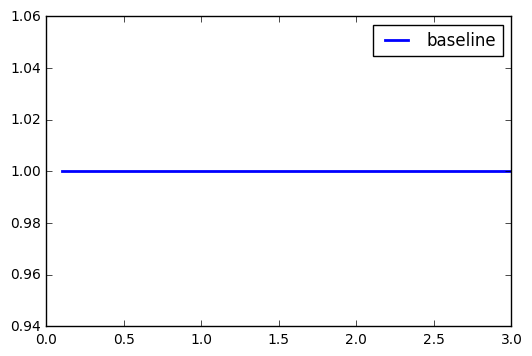

In [32]:
%matplotlib inline
pl.plot(grid, lamb0, label="baseline", lw=2)
pl.legend()

### Plot coefficients

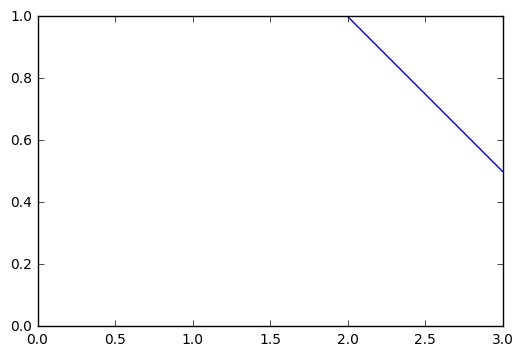

In [43]:
pl.axis([0, 3, 0, 1])
pl.plot(grid, beta[1])

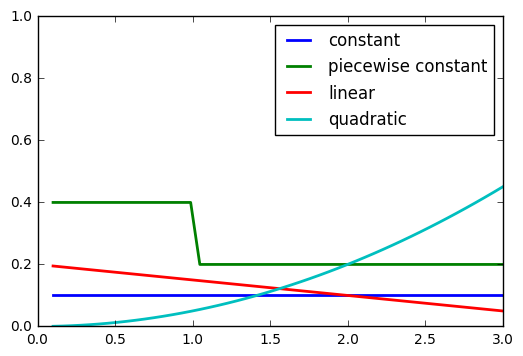

In [33]:
pl.axis([0, 3, 0, 1])
pl.plot(grid, beta_const(grid)*grid[0], label="constant", lw=2)
pl.plot(grid, beta_piecewise_const(grid)*grid[0], label="piecewise constant", lw=2)
pl.plot(grid, beta_linear(grid)*grid[0], label="linear", lw=2)
pl.plot(grid, beta_quadratic(grid)*grid[0], label="quadratic", lw=2)
pl.legend()

## Plot $x_i$

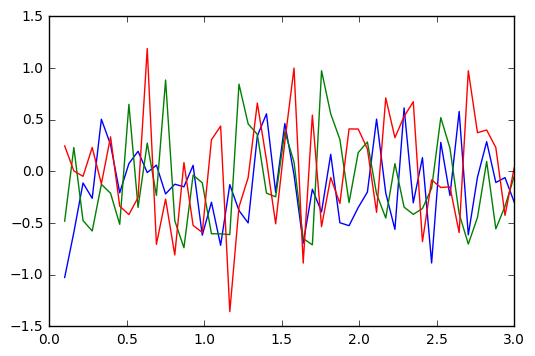

In [36]:
pl.plot(grid,X[0])

In [ ]:
def Xbeta_i(X_i,grid,params_2_const=(4.,2.,1.),params_lin=(2.,-0.5),params_quad=(0.5)):
    n_mes_i = X_i.shape[0]
    mes_i = X_i[:,1]
    cov_i= X_i[:,2::]
    #print cov_i.shape
    time_length = beta.shape[1]
    Xbeta_i=np.zeros(time_length)
    for t in np.arange(time_length):
        interval = 0
        condition = (grid[t] <= mes_i[0])
        while condition == False :
            interval += 1
            if interval < n_mes_i:
                condition = (grid[t] <= mes_i[interval])
        if interval >= n_mes_i:
                interval =n_mes_i-1
                condition = True
        Xbeta_i[t]= np.dot(cov_i[interval,:],beta[:,t])
    return Xbeta_i